# Complex Networks - Logistic Map, Lorenz and Real world time series.
Nonlinear Time Series Analysis - Computer Science Master's Degree Course - Federal University of São Paulo (UNIFESP) - Profª Laurita dos Santos

Author: Rafael Leiniö


## Algorithm Implementations

- [Drift Logistic Map](https://github.com/rafaelleinio/ntsa/blob/master/ntsa/algorithms/series_generator/drift_logistic_map_generator.py)

In [1]:
# fix working dir
import pathlib
import os
path = os.path.join(pathlib.Path().absolute(), '../..')
os.chdir(path)

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import math
import itertools
import networkx as nx

# my lib
from ntsa.tools.data_viz import DataViz
from ntsa.algorithms.series_generator import DriftLogisticMapGenerator

In [3]:
# functions
def remove_warm_up_points(series, cap=500):
    return series[cap:]

def get_max_min_values(series):
    return max(series), min(series)

def map_series_to_bins(series, n=5):
    max_value, min_value = get_max_min_values(series)
    data = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
    bins = np.linspace(min(data), max(data), n)
    return [str(value) for value in np.digitize(series, bins)]

def map_series_to_windows(series, m, delay):
    mapped_series = []
    n = len(series)
    for i in range(n):
        try:
            window_points = [series[i + delay * j] for j in range(m)]
            amplitude_rank = [int(value) for value in pd.Series(window_points).rank(method='first', ascending=False).to_list()]
            mapped_series.append(amplitude_rank)
        except IndexError:
            return mapped_series

def create_graph_from_window_series(series):
    graph = nx.DiGraph()
    edges = [(str(u), str(v)) for u, v in zip(series, series[1:])]
    for edge in edges:
        graph.add_edge(*edge)   
    return graph

def plot_graph(graph):
    label_dict = {node: node+'\n\n' for node in graph.nodes}
    nx.draw_circular(graph, with_labels=True, labels=label_dict)
    plt.show()

def create_series_analysis(generator, n=600, warmup=550, m=3, delay=2):
    xs = remove_warm_up_points(generator.generate_series(n), cap=warmup)
    print("Series points behavior:")
    plt.plot(xs)
    plt.show()

    window_xs = map_series_to_windows(xs, m, delay)
    print("First 5 points from windowed series:")
    print(window_xs[:5])

    print("\nShowing complex network:")
    graph = create_graph_from_window_series(window_xs)
    plot_graph(graph)

## Logistic Map

Series points behavior:


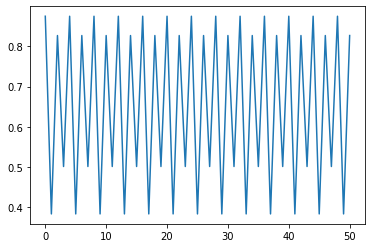

First 5 points from windowed series:
[[1, 3, 2], [2, 1, 3], [2, 1, 3], [1, 3, 2], [1, 3, 2]]

Showing complex network:


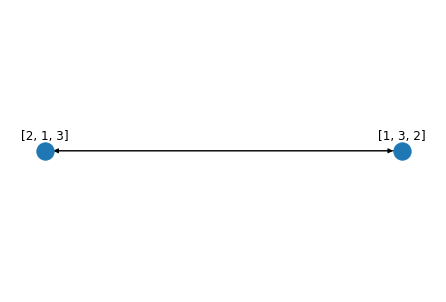

In [4]:
create_series_analysis(DriftLogisticMapGenerator(start_point=0.1, r=3.5, c=0), m=3, delay=2)

Series points behavior:


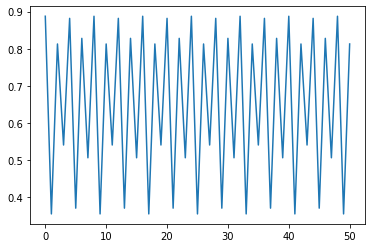

First 5 points from windowed series:
[[1, 3, 2], [3, 1, 2], [3, 1, 2], [1, 3, 2], [2, 3, 1]]

Showing complex network:


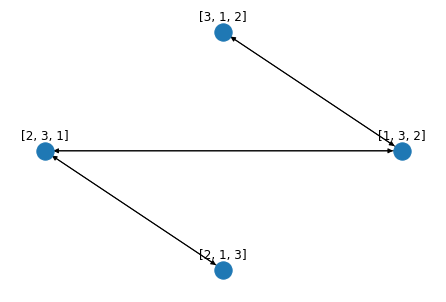

In [5]:
create_series_analysis(DriftLogisticMapGenerator(start_point=0.1, r=3.55, c=0), m=3, delay=2)

Series points behavior:


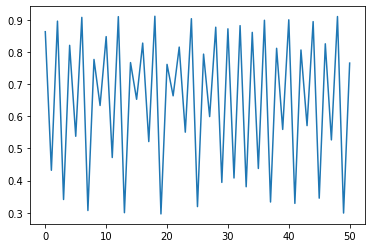

First 5 points from windowed series:
[[2, 1, 3], [2, 3, 1], [2, 3, 1], [2, 1, 3], [2, 1, 3]]

Showing complex network:


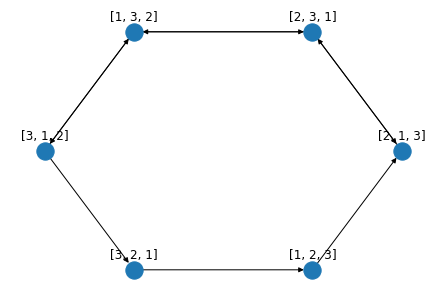

In [6]:
create_series_analysis(DriftLogisticMapGenerator(start_point=0.1, r=3.65, c=0), m=3, delay=2)

Series points behavior:


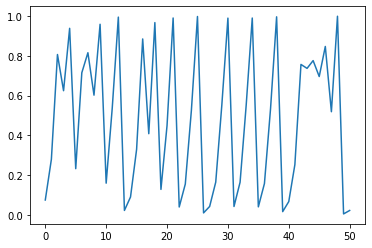

First 5 points from windowed series:
[[3, 2, 1], [2, 1, 3], [2, 1, 3], [2, 3, 1], [1, 2, 3]]

Showing complex network:


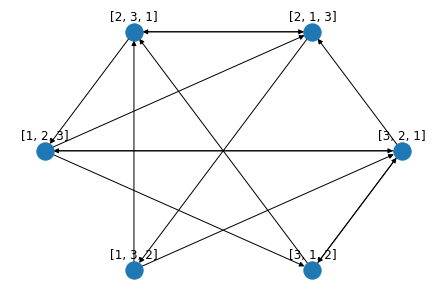

In [7]:
# caos
create_series_analysis(DriftLogisticMapGenerator(start_point=0.1, r=4, c=0), m=3, delay=2)